In [2]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext lab_black

In [3]:
dar_path_dict_dict = {
    y: {
        z.split("/")[-1].split("__")[-2]: z
        for z in sorted(glob.glob("downstream_analysis/DARs/" + y + "/*__DARs.bed"))
    }
    for y in [x.split("/")[-1] for x in sorted(glob.glob("downstream_analysis/DARs/*"))]
}

In [4]:
df_merged = pd.DataFrame()
for sample, dar_path_dict in dar_path_dict_dict.items():
    print(sample)
    for cell_type, dar_path in dar_path_dict.items():
        print(cell_type)
        df = pd.read_csv(dar_path, sep="\t", header=None)
        df["sample"] = sample
        df_merged = pd.concat([df_merged, df.iloc[:1000]])

BIO_ddseq_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
BIO_ddseq_2.FIXEDCELLS
B_cell
CD14+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
BIO_ddseq_3.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
BIO_ddseq_4.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
BRO_mtscatac_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
BRO_mtscatac_2.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
CNA_10xmultiome_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
CNA_10xmultiome_2.FIXEDCELLS
B_cell
CD14+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
CNA_10xv11_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16

In [5]:
df_merged.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]

In [6]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample
0,chr2,88845723,88846223,B_cell,4.347702,.,1.239461e-228,BIO_ddseq_1.FIXEDCELLS
1,chr3,13022485,13022985,B_cell,4.347702,.,1.239461e-228,BIO_ddseq_1.FIXEDCELLS
2,chr5,78727838,78728338,B_cell,4.347702,.,1.239461e-228,BIO_ddseq_1.FIXEDCELLS
3,chr7,74101020,74101520,B_cell,4.347702,.,1.239461e-228,BIO_ddseq_1.FIXEDCELLS
4,chr9,80231953,80232453,B_cell,4.347702,.,1.239461e-228,BIO_ddseq_1.FIXEDCELLS
...,...,...,...,...,...,...,...,...
995,chr3,10437203,10437703,Cytotoxic_T_cell,1.947959,.,2.088492e-307,VIB_hydrop_2.FIXEDCELLS
996,chr11,67614412,67614912,Cytotoxic_T_cell,1.947959,.,2.088492e-307,VIB_hydrop_2.FIXEDCELLS
997,chr16,81522387,81522887,Cytotoxic_T_cell,1.947959,.,2.088492e-307,VIB_hydrop_2.FIXEDCELLS
998,chr4,6690412,6690912,Cytotoxic_T_cell,1.947959,.,2.088492e-307,VIB_hydrop_2.FIXEDCELLS


In [7]:
df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample"]]

In [8]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample,tech
0,chr2,88845723,88846223,B_cell,4.347702,.,1.239461e-228,BIO_ddseq_1.FIXEDCELLS,ddseq
1,chr3,13022485,13022985,B_cell,4.347702,.,1.239461e-228,BIO_ddseq_1.FIXEDCELLS,ddseq
2,chr5,78727838,78728338,B_cell,4.347702,.,1.239461e-228,BIO_ddseq_1.FIXEDCELLS,ddseq
3,chr7,74101020,74101520,B_cell,4.347702,.,1.239461e-228,BIO_ddseq_1.FIXEDCELLS,ddseq
4,chr9,80231953,80232453,B_cell,4.347702,.,1.239461e-228,BIO_ddseq_1.FIXEDCELLS,ddseq
...,...,...,...,...,...,...,...,...,...
995,chr3,10437203,10437703,Cytotoxic_T_cell,1.947959,.,2.088492e-307,VIB_hydrop_2.FIXEDCELLS,hydrop
996,chr11,67614412,67614912,Cytotoxic_T_cell,1.947959,.,2.088492e-307,VIB_hydrop_2.FIXEDCELLS,hydrop
997,chr16,81522387,81522887,Cytotoxic_T_cell,1.947959,.,2.088492e-307,VIB_hydrop_2.FIXEDCELLS,hydrop
998,chr4,6690412,6690912,Cytotoxic_T_cell,1.947959,.,2.088492e-307,VIB_hydrop_2.FIXEDCELLS,hydrop


In [9]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

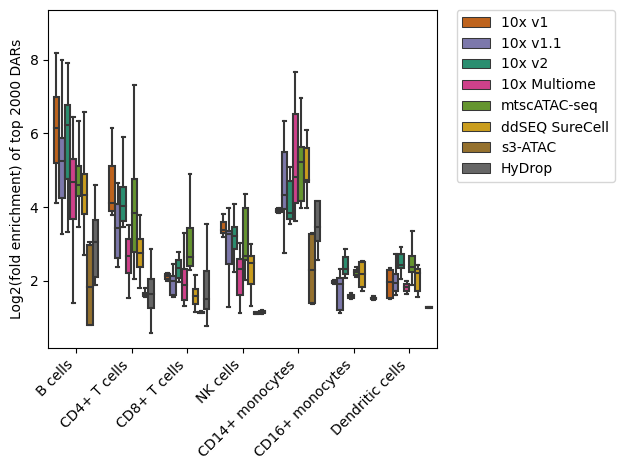

In [10]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged,
    x="cell_type",
    y="logfc",
    hue="tech",
    order=cell_type_order,
    hue_order=tech_order,
    palette=tech_color_palette,
    ax=ax,
    fliersize=0,
)
plt.xticks(rotation=45, ha="right")

plt.ylabel("Log2(fold enrichment) of top 2000 DARs")
plt.xlabel("")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels_alias = [cell_type_alias_dict[x] for x in labels]
ax.set_xticklabels(labels_alias)


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)
plt.tight_layout()
plt.savefig(
    "plts_final/FIXEDCELLS__top2k_DARs_logfc.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__top2k_DARs_logfc.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

# male/female DARs

In [14]:
dar_path_dict_dict = {
    y: {
        z.split("/")[-1].split("__")[-2]: z
        for z in sorted(glob.glob("male_female_DARs/" + y + "/*_DARs.bed"))
    }
    for y in [x.split("/")[-1] for x in sorted(glob.glob("male_female_DARs/*"))]
}
dar_path_dict_dict

{'BRO_mtscatac_1.FIXEDCELLS': {'sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte': 'male_female_DARs/BRO_mtscatac_1.FIXEDCELLS/BRO_mtscatac_1.FIXEDCELLS__sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte__1-2xfoldchange_DARs.bed',
  'sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte': 'male_female_DARs/BRO_mtscatac_1.FIXEDCELLS/BRO_mtscatac_1.FIXEDCELLS__sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte__1-2xfoldchange_DARs.bed',
  'sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell': 'male_female_DARs/BRO_mtscatac_1.FIXEDCELLS/BRO_mtscatac_1.FIXEDCELLS__sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell__1-2xfoldchange_DARs.bed',
  'sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell': 'male_female_DARs/BRO_mtscatac_1.FIXEDCELLS/BRO_mtscatac_1.FIXEDCELLS__sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell__1-2xfoldchange_DARs.bed',
  'sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell': 'male_female_DARs/BRO_mtscatac_1.FIXEDCELLS/BRO_mtscatac_1.FIXEDCELLS__sampleA_Natural_killer_cell_VS_sampl

In [15]:
df_merged = pd.DataFrame()
for sample, dar_path_dict in dar_path_dict_dict.items():
    print(sample)
    for cell_type, dar_path in dar_path_dict.items():
        print(cell_type)
        df = pd.read_csv(dar_path, sep="\t", header=None)
        df["sample"] = sample
        df_merged = pd.concat([df_merged, df.iloc[:2000]])

BRO_mtscatac_1.FIXEDCELLS
sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte
sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte
sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell
sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell
sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell
sampleB_B_cell_VS_sampleA_B_cell
sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte
sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte
sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell
sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell
BRO_mtscatac_2.FIXEDCELLS
sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte
sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte
sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell
sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell
sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell
sampleB_B_cell_VS_sampleA_B_cell
sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte
sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte
sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell
sampleB_Cytotoxic_T_cell_VS_sampleA_Cytot

In [16]:
df_merged.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]

In [17]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample
0,chr2,159090774,159091274,sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte,1.061026,.,0.019517,BRO_mtscatac_1.FIXEDCELLS
1,chr4,56649847,56650347,sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte,0.953435,.,0.025882,BRO_mtscatac_1.FIXEDCELLS
2,chr6,149045327,149045827,sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte,0.925149,.,0.019305,BRO_mtscatac_1.FIXEDCELLS
3,chr6,27684453,27684953,sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte,0.915749,.,0.015746,BRO_mtscatac_1.FIXEDCELLS
4,chr7,131099094,131099594,sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte,0.897938,.,0.028625,BRO_mtscatac_1.FIXEDCELLS
...,...,...,...,...,...,...,...,...
1995,chr11,45042459,45042959,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.774730,.,0.004225,VIB_hydrop_2.FIXEDCELLS
1996,chr7,16999870,17000370,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.774730,.,0.004225,VIB_hydrop_2.FIXEDCELLS
1997,chr10,89256319,89256819,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.774730,.,0.004225,VIB_hydrop_2.FIXEDCELLS
1998,chr12,16407284,16407784,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.774730,.,0.004225,VIB_hydrop_2.FIXEDCELLS


In [18]:
df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample"]]

In [19]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample,tech
0,chr2,159090774,159091274,sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte,1.061026,.,0.019517,BRO_mtscatac_1.FIXEDCELLS,mtscatac
1,chr4,56649847,56650347,sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte,0.953435,.,0.025882,BRO_mtscatac_1.FIXEDCELLS,mtscatac
2,chr6,149045327,149045827,sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte,0.925149,.,0.019305,BRO_mtscatac_1.FIXEDCELLS,mtscatac
3,chr6,27684453,27684953,sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte,0.915749,.,0.015746,BRO_mtscatac_1.FIXEDCELLS,mtscatac
4,chr7,131099094,131099594,sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte,0.897938,.,0.028625,BRO_mtscatac_1.FIXEDCELLS,mtscatac
...,...,...,...,...,...,...,...,...,...
1995,chr11,45042459,45042959,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.774730,.,0.004225,VIB_hydrop_2.FIXEDCELLS,hydrop
1996,chr7,16999870,17000370,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.774730,.,0.004225,VIB_hydrop_2.FIXEDCELLS,hydrop
1997,chr10,89256319,89256819,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.774730,.,0.004225,VIB_hydrop_2.FIXEDCELLS,hydrop
1998,chr12,16407284,16407784,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,0.774730,.,0.004225,VIB_hydrop_2.FIXEDCELLS,hydrop


In [20]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte'),
  Text(1, 0, 'sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte'),
  Text(2, 0, 'sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell'),
  Text(3, 0, 'sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell'),
  Text(4, 0, 'sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell'),
  Text(5, 0, 'sampleB_B_cell_VS_sampleA_B_cell'),
  Text(6, 0, 'sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte'),
  Text(7, 0, 'sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte'),
  Text(8, 0, 'sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell'),
  Text(9, 0, 'sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell'),
  Text(10, 0, 'sampleA_B_cell_VS_sampleB_B_cell'),
  Text(11, 0, 'sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell'),
  Text(12, 0, 'sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell'),
  Text(13, 0, 'sampleB_Dendritic_cell_VS_sampleA_Dendritic_cell')])

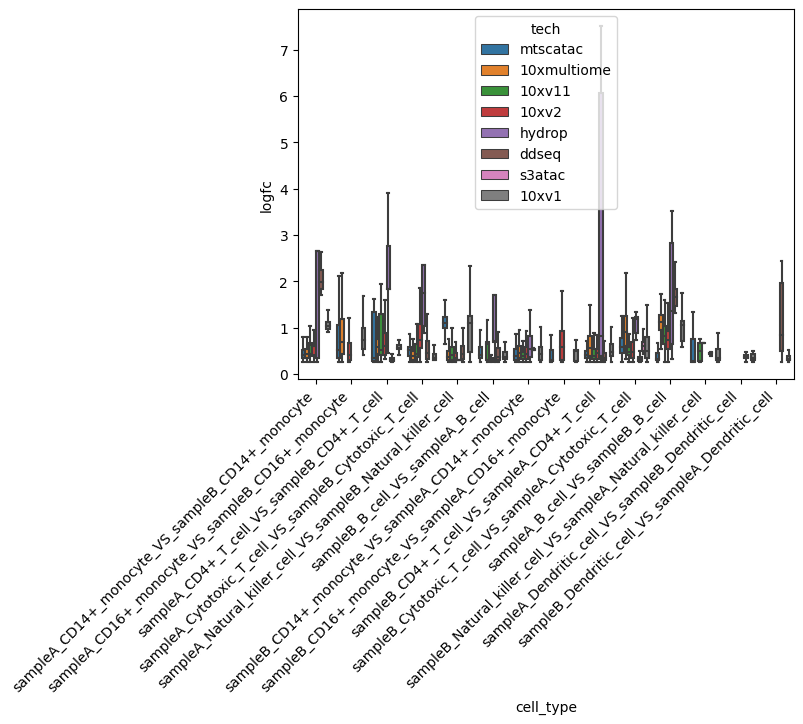

In [22]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged,
    x="cell_type",
    y="logfc",
    hue="tech",
    # order=cell_type_order,
    # hue_order=tech_order,
    # palette=tech_color_palette,
    ax=ax,
    fliersize=0,
)
plt.xticks(rotation=45, ha="right")

# plt.ylabel("Log2(fold enrichment) of top 2000 DARs")
# plt.xlabel("")
# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels_alias = [cell_type_alias_dict[x] for x in labels]
# ax.set_xticklabels(labels_alias)


# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(
#     handles[0 : len(tech_order)],
#     [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
#     bbox_to_anchor=(1.05, 1),
#     loc=2,
#     borderaxespad=0.0,
# )
# plt.tight_layout()
# plt.savefig(
#     "plts_final/FIXEDCELLS__top2k_DARs_logfc.png",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )
# plt.savefig(
#     "plts_final/FIXEDCELLS__top2k_DARs_logfc.svg",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )

In [29]:
df_stacked = (
    df_merged.groupby(["sample", "cell_type"])["logfc"]
    .median()
    .reset_index()
    .pivot(index="sample", columns="cell_type", values="logfc")
)

<AxesSubplot: xlabel='cell_type', ylabel='sample'>

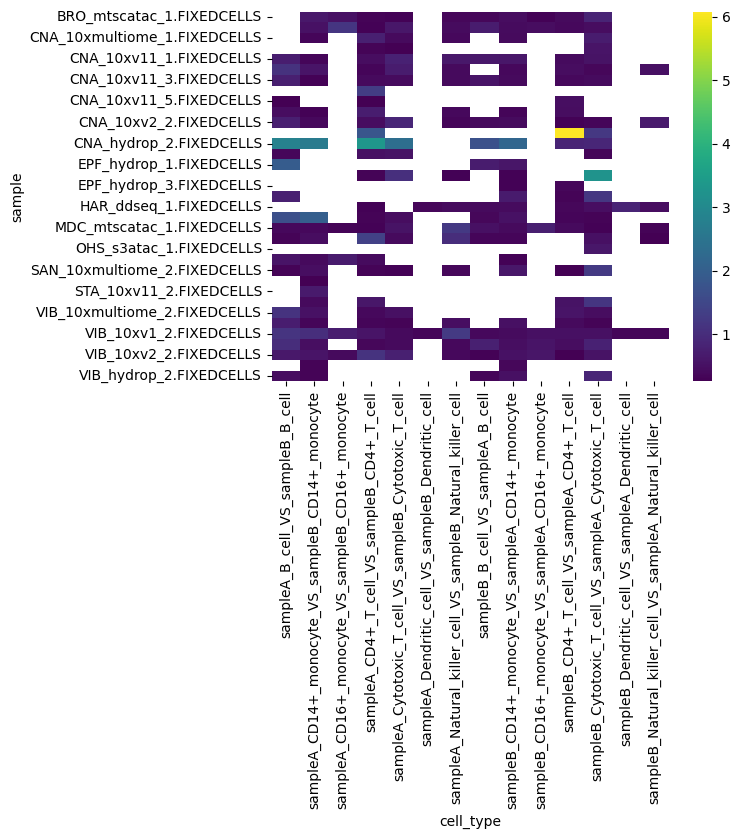

In [32]:
sns.heatmap(df_stacked, cmap="viridis")

In [35]:
df_test = df_merged.groupby(["sample", "cell_type"])["logfc"].median().reset_index()

In [37]:
df_test["tech"] = [x.split("_")[1] for x in df_test["sample"]]

In [47]:
df_test2 = (
    df_test.groupby(["tech", "cell_type"])["logfc"]
    .median()
    .reset_index()
    .pivot(index="tech", columns="cell_type", values="logfc")
)

<AxesSubplot: xlabel='cell_type', ylabel='tech'>

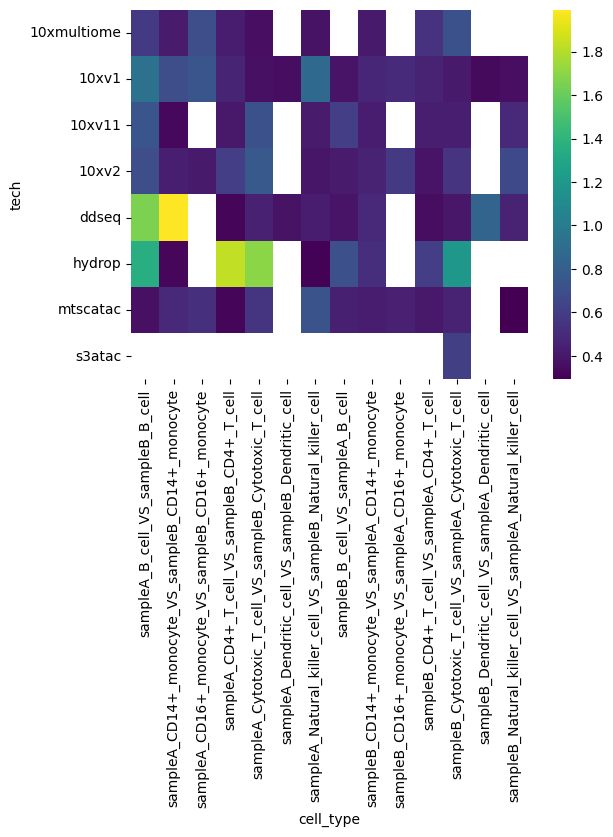

In [48]:
sns.heatmap(df_test2, cmap="viridis")